In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import datetime as dt

In [3]:
import weatherfeed as wf

# Modèle 03

Utilise le _Model02_ pour prédire la température intérieure de l'appartement 


<img src="images/sch_model03.jpg" width="500px" alt='schema mod03' />

### Get data from Model02

In [4]:
filename = './results/model02results.csv'

Ttuile = pd.read_csv( filename, index_col=0, parse_dates=True )

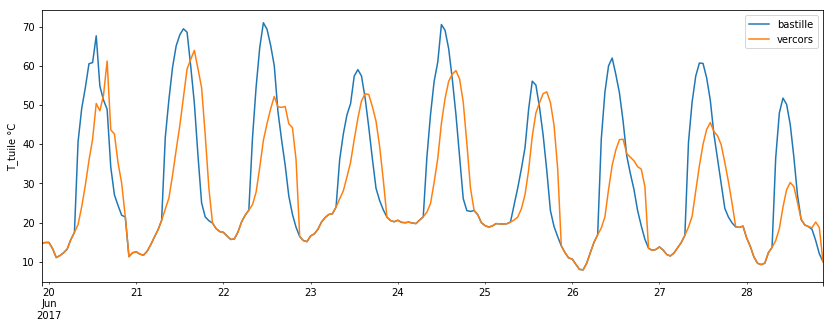

In [358]:
Ttuile.plot(figsize=(14, 5) ); plt.ylabel('T_tuile °C');

## Grandeurs physiques

In [274]:
Ttuile.columns

Index(['bastille', 'vercors', 'inertie_bastille'], dtype='object')

In [275]:
Ttuile['bastille'].mean()

27.28864370320375

In [276]:
surface_toiture = 37 # m2
ep_isolation = 0.2 # m

k_isolation = 0.035 # conductivité, laine de verre( ? ) 0.03 W/m/K - 0.04 W/m/K

In [277]:
Sh_pan = surface_toiture*k_isolation/ep_isolation

print( Sh_pan )

6.4750000000000005


In [278]:
flux = Sh_bastille * 20
print( flux )

129.5


In [279]:
k_isolation/ep_isolation * 20

3.5000000000000004

## Modèle 

In [359]:
# walls def. : 

T_nodes = Ttuile.copy()
Sh_nodes = {'bastille': Sh_pan, 'vercors' : Sh_pan}

In [360]:
T_nodes = T_nodes.resample('10min').interpolate(method='quadratic')

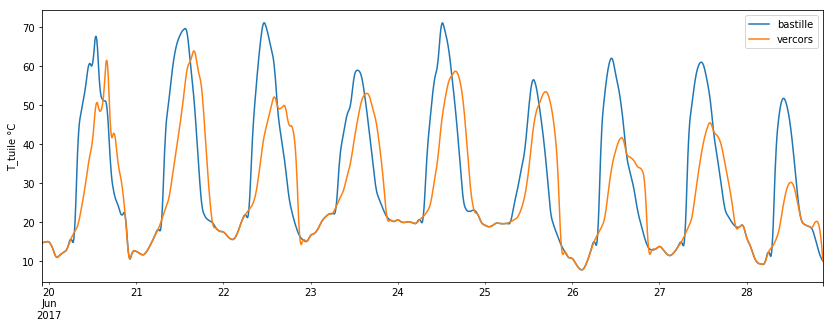

In [361]:
T_nodes.plot(figsize=(14, 5) ); plt.ylabel('T_tuile °C');

In [418]:
M = 1750000

In [419]:
righthandside = np.zeros( len( T_nodes ) )
somme_Sh = 0

for name in walls_def.keys():
    righthandside += T_nodes[ name ] * Sh_nodes[ name ]
    somme_Sh += Sh_nodes[ name ]

In [420]:
# TF (reel)
righthandside_TF = np.fft.rfft( righthandside  )
freq = np.fft.rfftfreq( righthandside.size, d=10*60 )

In [421]:
# modele
T_theo_TF = righthandside_TF / ( 2j*np.pi*freq*M + somme_Sh  )

# TF inverse
T_theo = np.fft.irfft( T_theo_TF, n=len( T_nodes ) )

In [427]:
T_nodes['T_theo']= T_theo
T_nodes['T_int']= df['T_int']

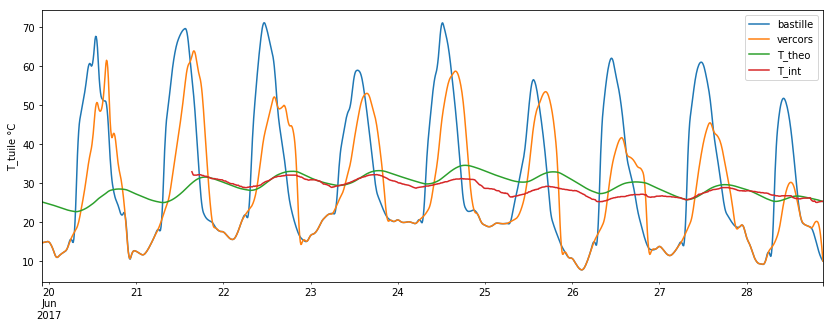

In [431]:
T_nodes.plot( figsize=(14, 5) ); plt.ylabel('T_tuile °C'); #plt.ylim([22, 35])

### Mesures exp

In [424]:
import emoncmsfeed as getfeeds

In [425]:
dataframefreq = '10min'
feeds =  {  'T_int':3 } # 'T_ext':2,

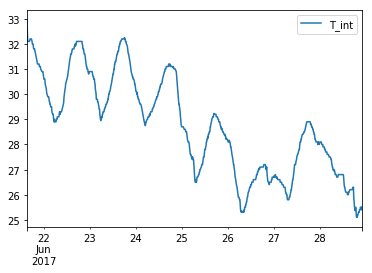

In [426]:
df = getfeeds.builddataframe( feeds, dataframefreq ) # startdate=pd.to_datetime('22/06/2017') 
df.plot();

In [371]:
df['T_theo'] = T_nodes['T_theo']

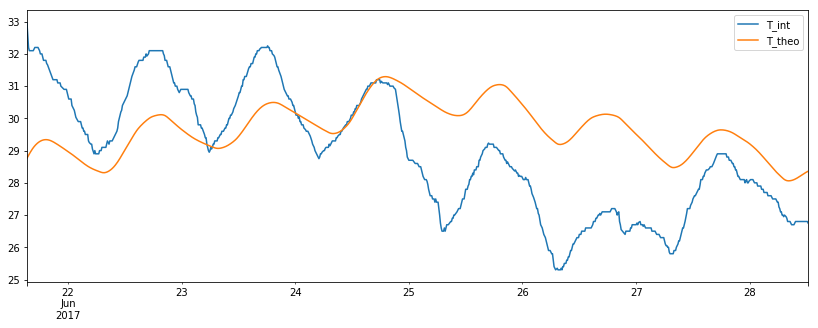

In [372]:
df.plot( figsize=(14, 5) )

In [379]:
T_nodes['T_int']= df['T_int']

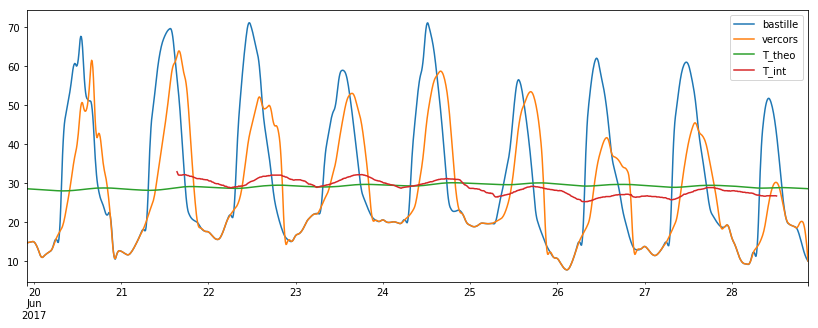

In [380]:
T_nodes.plot( figsize=(14, 5) )